In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
import numpy
from decimal import *

In [2]:
colunas = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']
train_df = pd.read_csv("dataset.csv", names = colunas)
train_df2 = pd.read_csv("dataset.csv", names = colunas)

train_df.__delitem__('X2')
train_df.__delitem__('X4')

In [3]:
for column in train_df.columns:
    train_df[column] = train_df[column].apply(lambda v:v.replace(',','.') if type(v) is str else v)
    train_df[column] = train_df[column].apply(lambda v:float(v))

In [4]:
X_df = train_df
Y_df = train_df['Y2']
X_df.__delitem__('Y1')
X_df.__delitem__('Y2')

X = X_df
Y = Y_df

tamanho_de_treino = 614

treino_dados = X[:tamanho_de_treino]
treino_marcacoes = Y[:tamanho_de_treino]

teste_dados = X[tamanho_de_treino:]
teste_marcacoes = Y[tamanho_de_treino:]

In [5]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.show()

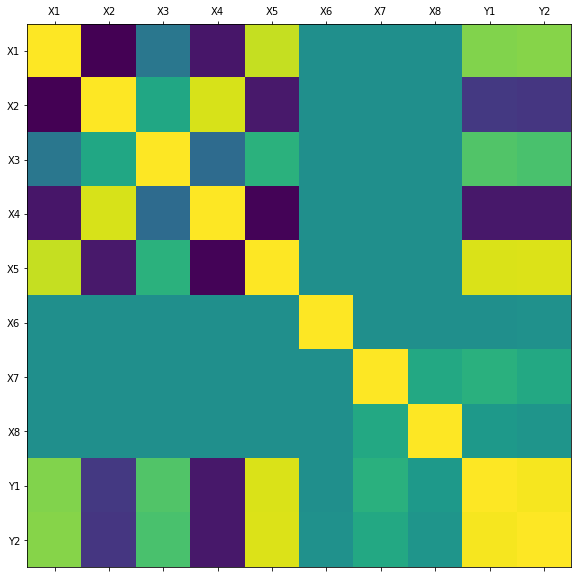

In [6]:
plot_corr(train_df2)

In [7]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression() 
regr.fit(treino_dados, treino_marcacoes)
r2_train = regr.score(treino_dados, treino_marcacoes)
print('Scores com regressão linear: %.2f' % r2_train)

Scores com regressão linear: 0.88


In [8]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(treino_dados, treino_marcacoes)
modelo.score(teste_dados, teste_marcacoes)

ValueError: Unknown label type: (array([10.9 , 10.94, 11.17, 11.19, 11.27, 11.29, 11.67, 11.72, 11.73,
       11.74, 11.93, 12.04, 12.05, 12.07, 12.08, 12.14, 12.22, 12.23,
       12.4 , 13.2 , 13.21, 13.32, 13.36, 13.39, 13.43, 13.44, 13.46,
       13.48, 13.49, 13.5 , 13.51, 13.53, 13.54, 13.57, 13.59, 13.6 ,
       13.65, 13.67, 13.7 , 13.71, 13.72, 13.75, 13.77, 13.79, 13.8 ,
       13.83, 13.87, 13.88, 13.89, 13.9 , 13.97, 13.99, 14.03, 14.09,
       14.11, 14.12, 14.14, 14.15, 14.18, 14.2 , 14.21, 14.23, 14.24,
       14.26, 14.27, 14.28, 14.29, 14.3 , 14.33, 14.34, 14.35, 14.37,
       14.38, 14.39, 14.4 , 14.42, 14.44, 14.45, 14.46, 14.47, 14.48,
       14.49, 14.5 , 14.54, 14.55, 14.57, 14.58, 14.6 , 14.61, 14.65,
       14.67, 14.71, 14.72, 14.73, 14.74, 14.75, 14.76, 14.81, 14.83,
       14.86, 14.87, 14.89, 14.91, 14.92, 14.94, 14.96, 14.97, 15.  ,
       15.03, 15.07, 15.09, 15.1 , 15.14, 15.17, 15.18, 15.19, 15.2 ,
       15.21, 15.22, 15.23, 15.24, 15.27, 15.28, 15.3 , 15.32, 15.35,
       15.37, 15.38, 15.4 , 15.41, 15.42, 15.44, 15.48, 15.5 , 15.52,
       15.53, 15.56, 15.57, 15.59, 15.63, 15.64, 15.66, 15.73, 15.76,
       15.77, 15.78, 15.8 , 15.81, 15.83, 15.85, 15.87, 15.89, 15.95,
       15.99, 16.03, 16.06, 16.13, 16.14, 16.17, 16.19, 16.22, 16.26,
       16.27, 16.39, 16.43, 16.44, 16.5 , 16.67, 16.75, 16.77, 16.78,
       16.8 , 16.87, 16.93, 16.94, 16.99, 17.  , 17.01, 17.03, 17.1 ,
       17.12, 17.15, 17.2 , 17.21, 17.22, 17.23, 17.25, 17.27, 17.37,
       17.47, 17.51, 17.85, 17.89, 17.95, 18.03, 18.14, 19.14, 19.18,
       19.23, 19.24, 19.25, 19.26, 19.29, 19.3 , 19.32, 19.34, 19.37,
       19.42, 19.43, 19.48, 19.65, 19.76, 19.87, 19.9 , 20.01, 20.03,
       20.13, 20.19, 20.28, 20.29, 20.37, 20.43, 20.46, 20.47, 20.48,
       20.56, 21.08, 21.09, 21.13, 21.16, 21.19, 21.33, 21.46, 21.97,
       22.53, 22.72, 22.73, 23.49, 23.77, 24.61, 24.77, 24.8 , 24.91,
       24.93, 25.02, 25.11, 25.16, 25.35, 25.38, 25.6 , 25.63, 25.64,
       25.68, 25.72, 25.81, 25.82, 25.84, 25.87, 25.88, 25.89, 25.9 ,
       25.91, 25.95, 25.98, 26.02, 26.08, 26.13, 26.14, 26.18, 26.29,
       26.3 , 26.37, 26.41, 26.44, 26.47, 26.53, 26.72, 26.95, 26.96,
       27.03, 27.17, 27.25, 27.3 , 27.31, 27.33, 27.34, 27.36, 27.38,
       27.4 , 27.54, 27.57, 27.69, 27.76, 27.84, 27.87, 27.89, 27.93,
       28.02, 28.14, 28.27, 28.28, 28.31, 28.38, 28.51, 28.61, 28.68,
       28.76, 28.77, 28.79, 28.88, 28.95, 28.99, 29.13, 29.28, 29.31,
       29.34, 29.36, 29.4 , 29.43, 29.44, 29.45, 29.49, 29.52, 29.53,
       29.58, 29.59, 29.6 , 29.61, 29.62, 29.67, 29.68, 29.69, 29.77,
       29.78, 29.79, 29.82, 29.87, 29.88, 29.9 , 29.92, 30.  , 30.02,
       30.08, 30.1 , 30.12, 30.17, 30.18, 30.19, 30.2 , 30.34, 30.53,
       30.66, 30.89, 30.91, 30.93, 31.01, 31.06, 31.27, 31.28, 31.39,
       31.7 , 31.71, 31.73, 31.76, 31.9 , 32.  , 32.04, 32.12, 32.25,
       32.28, 32.46, 32.54, 32.64, 32.71, 32.77, 32.83, 32.85, 32.92,
       32.93, 32.96, 33.01, 33.04, 33.13, 33.16, 33.17, 33.34, 33.37,
       33.47, 33.52, 33.54, 33.62, 33.64, 33.67, 33.78, 33.85, 33.87,
       33.88, 33.89, 33.91, 33.93, 33.94, 33.98, 34.05, 34.07, 34.11,
       34.14, 34.15, 34.17, 34.18, 34.19, 34.2 , 34.25, 34.29, 34.33,
       34.35, 34.43, 34.45, 34.48, 34.5 , 34.52, 34.62, 34.73, 34.94,
       34.99, 35.1 , 35.28, 35.29, 35.39, 35.48, 35.56, 35.62, 35.73,
       35.92, 35.99, 36.07, 36.12, 36.15, 36.16, 36.26, 36.35, 36.38,
       36.44, 36.62, 36.66, 36.73, 36.76, 36.77, 36.81, 36.85, 36.86,
       36.87, 36.93, 37.01, 37.05, 37.12, 37.19, 37.2 , 37.26, 37.28,
       37.29, 37.35, 37.41, 37.45, 37.51, 37.54, 37.58, 37.72, 37.73,
       37.76, 37.81, 38.35, 38.84, 39.07, 39.28, 39.41, 39.44, 39.48,
       39.55, 39.7 , 40.4 , 40.47, 40.63, 40.66, 40.85, 40.99, 41.07,
       41.22, 41.26, 41.68, 41.86, 42.86, 43.12, 43.14, 43.3 , 43.33,
       43.66, 43.73, 43.8 , 43.86, 44.16, 45.13, 45.28, 45.29, 45.48,
       45.52, 45.59, 45.97, 46.94, 48.03]),)

In [ ]:
from matplotlib import pyplot as pl
def lin_regression(x, y):
    """Simple linear regression (y = m * x + b + error)."""
    m, b, R, p, SEm = linregress(x, y)

    # need to compute SEb, linregress only computes SEm
    n = len(x)
    SSx = np.var(x, ddof=1) * (n-1)  # this is sum( (x - mean(x))**2 )
    SEb2 = SEm**2 * (SSx/n + np.mean(x)**2)
    SEb = SEb2**0.5

    return m, b, SEm, SEb, R, p

In [ ]:
m, b, Sm, Sb, R, p = lin_regression(treino_dados, treino_marcacoes)